# Various Operations on Images 

## Color Space Conversion using OpenCV

In [34]:
import cv2
import matplotlib.pyplot as plt

## Image in BGR Color Space

In [35]:
img = cv2.imread('messi.jpg')

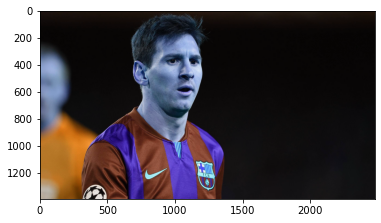

In [36]:
plt.imshow(img) # cv2 reads images in BGR format by default

## Image in RGB Color Space

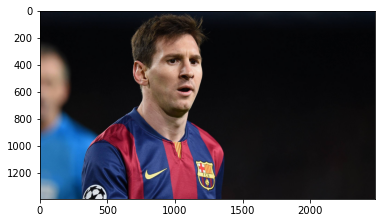

In [37]:
original_img = img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

## Image in Gray Scale

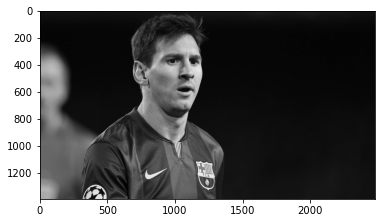

In [38]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_rgb, cmap="gray")

## Image in Hue-Saturation-Value Color Space

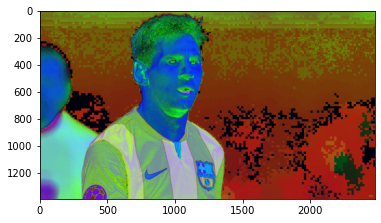

In [39]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_rgb)

# Resizing Images Using OpenCV

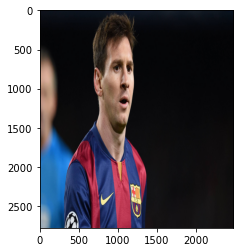

In [40]:
img_resize = cv2.resize(original_img, None, fx=1, fy=2,interpolation=cv2.INTER_CUBIC)
plt.imshow(img_resize)

# Image Rotation Using OpenCV

## Rotation by 90 degrees

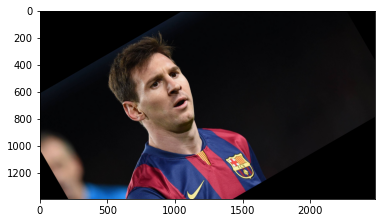

In [41]:
img_rot = cv2.warpAffine(original_img, cv2.getRotationMatrix2D((img.shape[1]/2,img.shape[0]/2),30,1), (img.shape[1],img.shape[0]))
plt.imshow(img_rot)

## Changing brightness and contrast using OpenCV

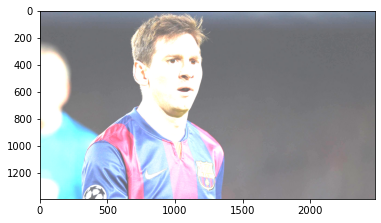

In [42]:
# alpha => Contrast
# beta => Brightness

new_img = cv2.convertScaleAbs(original_img, alpha=2, beta=100)
plt.imshow(new_img)

# Image Thresholding in OpenCV

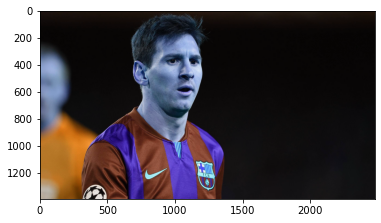

In [43]:
img = cv2.imread('messi.jpg')
plt.imshow(img)

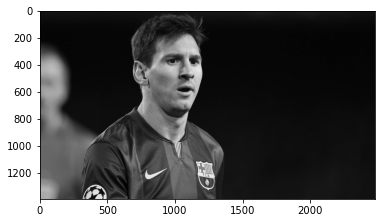

In [44]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

In [45]:
img_red_ = img[:,:,-1].copy()
img_green_ = img[:,:,-2].copy()
img_blue_ = img[:,:,-3].copy()

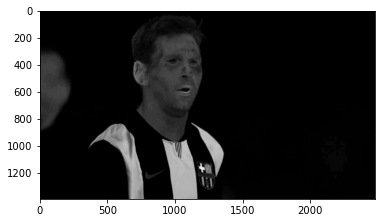

In [46]:
img_blue = cv2.subtract(img_red_, img_gray)
plt.imshow(img_blue, cmap='gray')

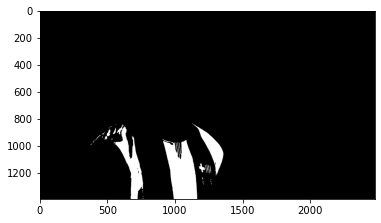

In [47]:
r, img_thresh = cv2.threshold(img_blue, 75, 244, cv2.THRESH_BINARY)
plt.imshow(img_thresh, cmap='gray')

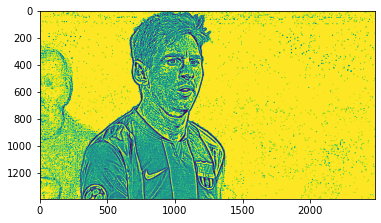

In [48]:
img_thresh = cv2.adaptiveThreshold(img_red_, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2 )
plt.imshow(img_thresh)

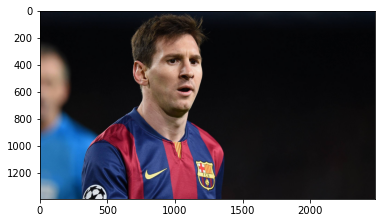

In [49]:
import numpy as np 

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

rows, columns, plane = img.shape

img_copy = img.copy().astype(np.uint16)

plt.imshow(img_copy)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


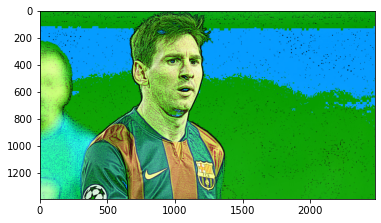

In [50]:
for r in range(rows):
    for c in range(columns):
        if img_thresh[r, c] == 255:
            img_copy[r,c,-1] = np.subtract(img_copy[r,c,-1], np.uint16(10))
            img_copy[r,c,-2] = np.add(img_copy[r,c,-2], np.uint16(150))
plt.imshow(img_copy)

# Performing Operations using SkImage

In [51]:
import skimage.color as skc
import skimage.io as skio
import skimage.transform as skt

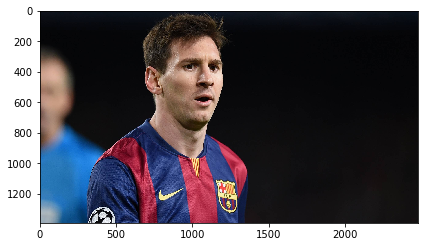

In [52]:
skio.imshow("messi.jpg")

## Changing Color Space

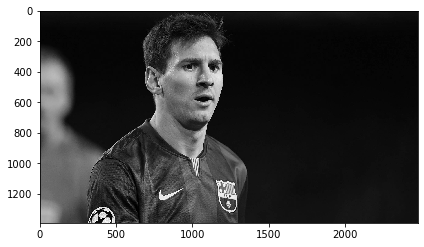

In [53]:
img = skio.imread('messi.jpg')
img_gray = skc.rgb2gray(img)
skio.imshow(img_gray)

## Cropping Images

In [54]:
img.shape

(1390, 2477, 3)

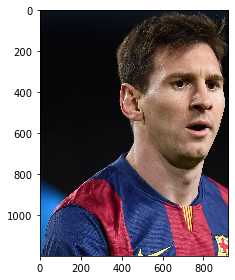

In [55]:
img_crop = img[10:1210, 300:1220, :].copy()
skio.imshow(img_crop)

## Image Rotation

### Rotation by 90 Degrees

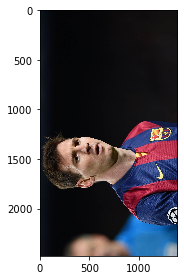

In [56]:
img_rot_90 = skt.rotate(img, 90, resize=True)
skio.imshow(img_rot_90)

### Rotation by 45 Degrees

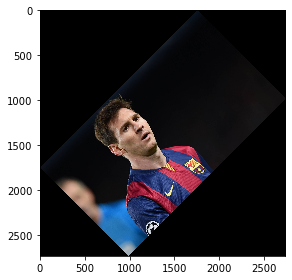

In [57]:
img_rot_45 = skt.rotate(img, 45, resize=True)
skio.imshow(img_rot_45)

## Changing Brightness and Contrast

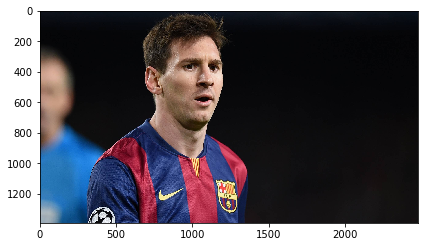

In [58]:
skio.imshow(img)

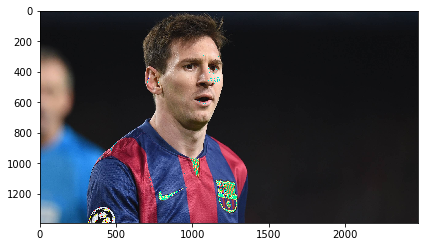

In [59]:
img_bright = img.copy() + 10
skio.imshow(img_bright)

In [60]:
img.dtype

dtype('uint8')

In [61]:
import numpy as np

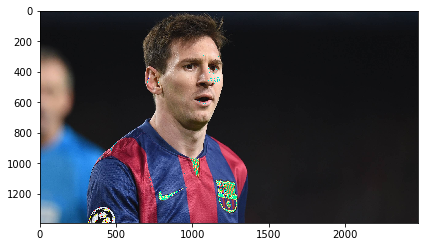

In [62]:
mg_bright = np.add(img.copy().astype(np.uint16), np.uint16(100))
skio.imshow(img_bright)

In [63]:
img_bright.max()

255

## Changing Contrast 

In [64]:
import warnings
warnings.filterwarnings("ignore")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


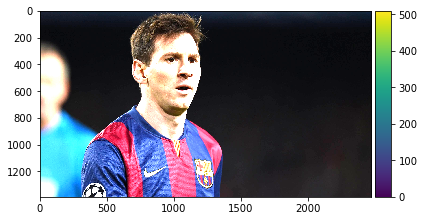

In [65]:
img_contrast = np.multiply(img.copy().astype(np.uint16), np.uint16(2))
skio.imshow(img_contrast)

In [66]:
# Done